In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Current conditions

#### Import data and compute mean and percentiles

In [2]:
# Load the file with the data of the current state of the system evaluated with multiple combinations of parameters
current_data = np.loadtxt('output/results_stochastic_current_operational.csv', delimiter=',')
classes = 10

mean = np.zeros((classes, 4))
per_5 = np.zeros((classes, 4))
per_95 = np.zeros((classes, 4))

for var in range(4):
    dx = (np.max(current_data[:, var]) - np.min(current_data[:, var]))/classes
    for i in range(classes):
        min = np.min(current_data[:, var])+i*dx
        max = np.min(current_data[:, var])+(i+1)*dx
        mean[i, var] = np.mean(current_data[np.logical_and(current_data[:, var] >= min, current_data[:, var] < max), 4])
        per_5[i, var] = np.percentile(current_data[np.logical_and(current_data[:, var] >= min, current_data[:, var] < max), 4], 5)
        per_95[i, var] = np.percentile(current_data[np.logical_and(current_data[:, var] >= min, current_data[:, var] < max), 4], 95)


#### Plot current data vs Stochastic variables

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26108\4245002357.py:40: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0].set_color('dimgray')


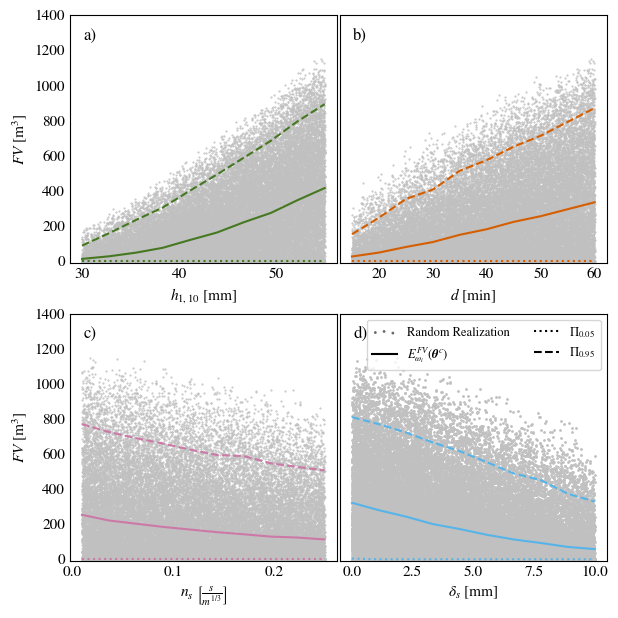

In [3]:
plt.style.use('stylesheet.mpltstyle')
fig, ax = plt.subplots(2, 2, figsize=(6, 6), sharey=True)
ax[0,0].plot(current_data[:,0], current_data[:,4:]*1000, '.', markersize = 1, color = 'silver')
ax[0,0].plot(np.linspace(np.min(current_data[:,0]), np.max(current_data[:,0]), classes), mean[:,0]*1000, color = '#467821', label='Mean')
ax[0,0].plot(np.linspace(np.min(current_data[:,0]), np.max(current_data[:,0]), classes), per_5[:,0]*1000, color = '#467821', linestyle = ':', label=r'$P_{0.05}$')
ax[0,0].plot(np.linspace(np.min(current_data[:,0]), np.max(current_data[:,0]), classes), per_95[:,0]*1000, color = '#467821', linestyle = '--', label=r'$P_{0.95}$')
ax[0,0].set_ylim([0, 1400])
ax[0,0].set_xlabel('$h_{1,10}$ [mm]')
ax[0,0].set_ylabel('$FV$ [m$^3$]')
ax[0,0].text(0.05, 0.95, 'a)', transform=ax[0,0].transAxes, fontsize=12, va='top')
# ax[0,0].legend(loc='upper left')

ax[0,1].plot(current_data[:,1], current_data[:,4:]*1000, '.', markersize = 1, color = 'silver')
ax[0,1].plot(np.linspace(np.min(current_data[:,1]), np.max(current_data[:,1]), classes), mean[:,1]*1000, color = '#D55E00', label='Mean')
ax[0,1].plot(np.linspace(np.min(current_data[:,1]), np.max(current_data[:,1]), classes), per_5[:,1]*1000, color = '#D55E00', linestyle = ':', label=r'$P_{0.05}$')
ax[0,1].plot(np.linspace(np.min(current_data[:,1]), np.max(current_data[:,1]), classes), per_95[:,1]*1000, color = '#D55E00', linestyle = '--', label=r'$P_{0.95}$')
ax[0,1].set_ylim([0, 1400])
ax[0,1].set_xlabel('$d$ [min]')
ax[0,1].text(0.05, 0.95, 'b)', transform=ax[0,1].transAxes, fontsize=12, va='top')
# ax[0,1].legend(loc='upper left')

ax[1,0].plot(current_data[:,2], current_data[:,4:]*1000, '.', markersize = 1, color = 'silver')
ax[1,0].plot(np.linspace(np.min(current_data[:,2]), np.max(current_data[:,2]), classes), mean[:,2]*1000, color = '#CC79A7', label='Mean')
ax[1,0].plot(np.linspace(np.min(current_data[:,2]), np.max(current_data[:,2]), classes), per_5[:,2]*1000, color = '#CC79A7', linestyle = ':', label=r'$P_{0.05}$')
ax[1,0].plot(np.linspace(np.min(current_data[:,2]), np.max(current_data[:,2]), classes), per_95[:,2]*1000, color = '#CC79A7', linestyle = '--', label=r'$P_{0.95}$')
ax[1,0].set_ylim([0, 1400])
ax[1,0].set_xlabel(r'$n_s$ $\left[\frac{s}{m^{1/3}}\right]$')
ax[1,0].set_ylabel('$FV$ [m$^3$]')
ax[1,0].text(0.05, 0.95, 'c)', transform=ax[1,0].transAxes, fontsize=12, va='top')
# ax[1,0].legend(loc='upper right')

ax[1,1].scatter(current_data[:,3], current_data[:,4:]*1000, s=1, color = 'silver', label = 'Random Realization')
ax[1,1].plot(np.linspace(np.min(current_data[:,3]), np.max(current_data[:,3]), classes), mean[:,3]*1000, color = '#56B4E9', label= r'$E_{\omega_i}^{FV}(\mathbfit{\theta}^c)$')
ax[1,1].plot(np.linspace(np.min(current_data[:,3]), np.max(current_data[:,3]), classes), per_5[:,3]*1000, color = '#56B4E9', linestyle = ':', label= r'$\Pi_{0.05}$')
ax[1,1].plot(np.linspace(np.min(current_data[:,3]), np.max(current_data[:,3]), classes), per_95[:,3]*1000, color = '#56B4E9', linestyle = '--', label= r'$\Pi_{0.95}$')
ax[1,1].set_ylim([-10, 1400])
ax[1,1].set_xlabel('$\delta_s$ [mm]')
ax[1,1].text(0.05, 0.95, 'd)', transform=ax[1,1].transAxes, fontsize=12, va='top')
legend = ax[1,1].legend(loc='upper right', labelcolor = 'black', ncol = 2, scatterpoints = 3)
legend.legendHandles[0].set_color('dimgray')
legend.get_lines()[0].set_color('black')
legend.get_lines()[1].set_color('black')
legend.get_lines()[2].set_color('black')

plt.savefig('Figures_paper/stochastic_variables_current.png', dpi=400, bbox_inches='tight')
plt.savefig('Figures_paper/stochastic_variables_current.pdf')

#### Sensitivity Analysis - Stochastic Quantities

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26108\2489042471.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


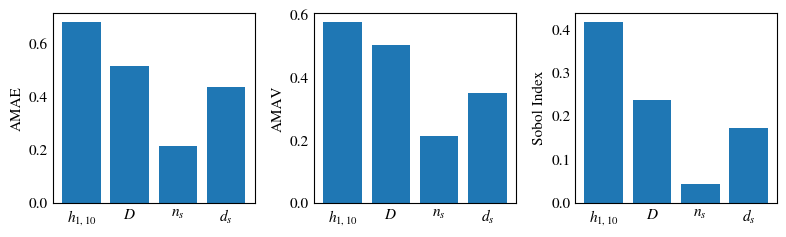

In [4]:
classes = 10

AMAE = np.zeros(4)
AMAV = np.zeros(4)
Si = np.zeros(4)

cond_mean = np.zeros((4, classes))
cond_var = np.zeros((4, classes))

for var in range(4):
    dx = (np.max(current_data[:, var]) - np.min(current_data[:, var]))/classes
    for i in range(classes):
        min = np.min(current_data[:, var])+i*dx
        max = np.min(current_data[:, var])+(i+1)*dx
        cond_mean[var, i] = np.mean(current_data[np.logical_and(current_data[:, var] >= min, current_data[:, var] < max), 4])
        cond_var[var, i] = np.var(current_data[np.logical_and(current_data[:, var] >= min, current_data[:, var] < max), 4])

    Si[var] = (np.var(cond_mean[var,:],ddof=1))/np.var(current_data[:,4])
    AMAE[var] = np.mean(abs(cond_mean[var,:]-np.mean(current_data[:,4])))/abs(np.mean(current_data[:,4]))
    AMAV[var] = np.mean(abs(cond_var[var,:]-np.var(current_data[:,4])))/abs(np.var(current_data[:,4]))

plt.style.use('stylesheet.mpltstyle')
xticks = ['$h_{1,10}$', '$D$', r'$n_s$', '$d_s$']
fig, ax = plt.subplots(1, 3, figsize=(8, 2.5))

ax[0].bar(np.arange(4), AMAE)
ax[0].set_xticks(range(len(xticks)), xticks)
ax[0].set_ylabel('AMAE')

ax[1].bar(np.arange(4), AMAV)
ax[1].set_xticks(range(len(xticks)), xticks)
ax[1].set_ylabel('AMAV')

ax[2].bar(np.arange(4), Si)
ax[2].set_xticks(range(len(xticks)), xticks)
ax[2].set_ylabel('Sobol Index')

plt.tight_layout()

#### Exceedance probability as a function of stochastic variables

#### AMAP vs k

In [5]:
K = np.linspace(1, 500, 500)

classes = 5
n_pars = 3

roughnesses_pipes = [0.009091, 0.014286]
diameters = [0.3, 0.4, 0.5, 0.6]
CN_decreases = [5, 10, 15]

table_pars = np.zeros((24, n_pars))
i = 0
for roughness in roughnesses_pipes:
    for diameter in diameters:
        for cn in CN_decreases:
            table_pars[i, :] = [roughness, diameter, cn]
            i += 1

In [6]:
data_operational = np.loadtxt('output/results_stochastic00.csv', delimiter=',')
data_current = np.loadtxt('output/results_stochastic_current_operational.csv', delimiter=',')
concatenado = np.concatenate((table_pars.T, data_operational[:,4:])).T

P_uncond = np.zeros(len(K))
P_current = np.zeros(len(K))
P_d = np.zeros((len(K), len(diameters)))
P_r = np.zeros((len(K), len(roughnesses_pipes)))
P_cn = np.zeros((len(K), len(CN_decreases)))

for num_t, t in enumerate(K):

    for num_d, d in enumerate(diameters):
        filter1 = concatenado[concatenado[:,1]==d, 4:]
        P_d[num_t, num_d] = (filter1>=t/1000).sum()/(filter1.shape[0]*filter1.shape[1])

    for num_r, r in enumerate(roughnesses_pipes):
        filter1 = concatenado[concatenado[:,0]==r, 4:]
        P_r[num_t, num_r] = (filter1>=t/1000).sum()/(filter1.shape[0]*filter1.shape[1])

    for num_cn, cn in enumerate(CN_decreases):
        filter1 = concatenado[concatenado[:,2]==cn, 4:]
        P_cn[num_t, num_cn] = (filter1>=t/1000).sum()/(filter1.shape[0]*filter1.shape[1])

    P_uncond[num_t] = (concatenado[:,4:]>=t/1000).sum()/(concatenado[:,4:].shape[0]*concatenado[:,4:].shape[1])
    P_current[num_t] = (data_current[:,4]>=t/1000).sum()/(data_current[:,4].shape[0])

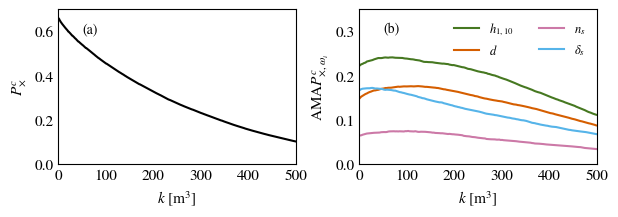

In [7]:
AMAP = np.zeros((4, len(K)))

P_conditional = np.zeros((4,classes))

for num_k, k in enumerate(K):
    p_uncond = np.sum(current_data[:,4]*1000 > k)/len(current_data[:,4])

    for var in range(4):
        dx = (np.max(current_data[:, var]) - np.min(current_data[:, var]))/classes
        for i in range(classes):
            min = np.min(current_data[:, var])+i*dx
            max = np.min(current_data[:, var])+(i+1)*dx
            data_in_class = current_data[np.logical_and(current_data[:, var] >= min, current_data[:, var] < max), 4]
            P_conditional[var, i] = np.sum(data_in_class*1000 > k)/len(data_in_class)
        AMAP[var, num_k] = np.mean(np.abs(p_uncond - P_conditional[var, :]))

plt.style.use('stylesheet.mpltstyle')
fig, ax = plt.subplots(1, 2, figsize=(6, 2.0), sharex=True)

ax[0].plot(K, P_current, color = 'black')
ax[0].set_ylabel(r'$P_{\times}^c$')
ax[0].text(0.1, 0.85, '(a)', transform=ax[0].transAxes, fontsize = 10)
ax[0].set_xlabel('$k$ [m$^3$]')
ax[0].set_xlim(0, 500)
ax[0].set_ylim([0, 0.7])

ax[1].plot(K[::3], AMAP[0,::3], label='$h_{1,10}$', color = '#467821')
ax[1].plot(K[::3], AMAP[1,::3], label='$d$', color = '#D55E00')
ax[1].plot(K[::3], AMAP[2,::3], label='$n_s$', color = '#CC79A7')
ax[1].plot(K[::3], AMAP[3,::3], label='$\delta_s$', color = '#56B4E9')
ax[1].text(0.1, 0.85, '(b)', transform=ax[1].transAxes, fontsize = 10)
ax[1].set_xlabel('$k$ [m$^3$]')
ax[1].set_ylabel(r'$\text{AMA}P_{\times,\omega_i}^c$')
ax[1].set_ylim([0, 0.35])
ax[1].legend(ncol = 2, frameon = False)

plt.savefig('Figures_paper/AMAP_current.png', dpi=400, bbox_inches='tight')
plt.savefig('Figures_paper/AMAP_current.pdf')

### Future data

#### Import and compute mean and percentiles

In [8]:
data_operational = np.loadtxt('output/results_stochastic00.csv', delimiter=',')

mean = np.zeros((classes, 4))
per_5 = np.zeros((classes, 4))
per_95 = np.zeros((classes, 4))

for var in range(4):
    dx = (np.max(data_operational[:, var]) - np.min(data_operational[:, var]))/classes
    for i in range(classes):
        min = np.min(data_operational[:, var])+i*dx
        max = np.min(data_operational[:, var])+(i+1)*dx
        mean[i, var] = np.mean(data_operational[np.logical_and(data_operational[:, var] >= min, data_operational[:, var] < max), 4])
        per_5[i, var] = np.percentile(data_operational[np.logical_and(data_operational[:, var] >= min, data_operational[:, var] < max), 4], 5)
        per_95[i, var] = np.percentile(data_operational[np.logical_and(data_operational[:, var] >= min, data_operational[:, var] < max), 4], 95)

#### Classical Sensitivity analysis - Stochastic Quantities (THIS DOESN'T MAKE SENSE)

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26108\2644793602.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


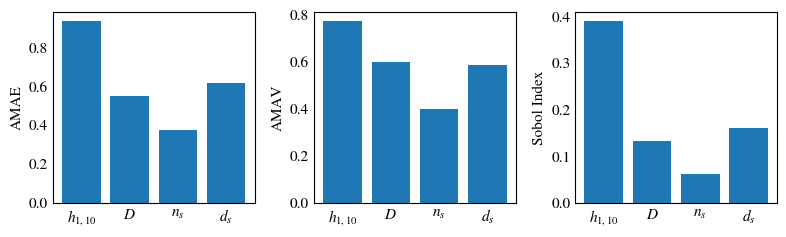

In [9]:
AMAE = np.zeros(4)
AMAV = np.zeros(4)
Si = np.zeros(4)

cond_mean = np.zeros((4, classes))
cond_var = np.zeros((4, classes))

for var in range(4):
    dx = (np.max(data_operational[:, var]) - np.min(data_operational[:, var]))/classes
    for i in range(classes):
        min = np.min(data_operational[:, var])+i*dx
        max = np.min(data_operational[:, var])+(i+1)*dx
        cond_mean[var, i] = np.mean(data_operational[np.logical_and(data_operational[:, var] >= min, data_operational[:, var] < max), 4])
        cond_var[var, i] = np.var(data_operational[np.logical_and(data_operational[:, var] >= min, data_operational[:, var] < max), 4])

    Si[var] = (np.var(cond_mean[var,:],ddof=1))/np.var(data_operational[:,4])
    AMAE[var] = np.mean(abs(cond_mean[var,:]-np.mean(data_operational[:,4])))/abs(np.mean(data_operational[:,4]))
    AMAV[var] = np.mean(abs(cond_var[var,:]-np.var(data_operational[:,4])))/abs(np.var(data_operational[:,4]))

plt.style.use('stylesheet.mpltstyle')
xticks = ['$h_{1,10}$', '$D$', r'$n_s$', '$d_s$']
fig, ax = plt.subplots(1, 3, figsize=(8, 2.5))

ax[0].bar(np.arange(4), AMAE)
ax[0].set_xticks(range(len(xticks)), xticks)
ax[0].set_ylabel('AMAE')

ax[1].bar(np.arange(4), AMAV)
ax[1].set_xticks(range(len(xticks)), xticks)
ax[1].set_ylabel('AMAV')

ax[2].bar(np.arange(4), Si)
ax[2].set_xticks(range(len(xticks)), xticks)
ax[2].set_ylabel('Sobol Index')

plt.tight_layout()

#### Operational AMA_SM indices

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26108\2745291276.py:42: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[0,0].set_xlim(0, 0.2)
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26108\2745291276.py:82: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[1,0].set_xlim(0, 0.05)
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26108\2745291276.py:113: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


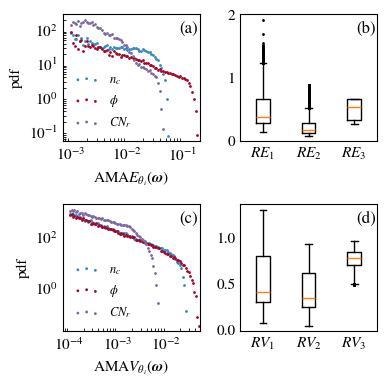

In [10]:
plt.style.use('stylesheet.mpltstyle')
fig, ax = plt.subplots(2, 2, figsize=(4, 4))


operational_data = np.loadtxt('output/results_stochastic00.csv', delimiter=',')

SA_indices = []

n_indices = 2
Output = np.zeros((len(table_pars),2))
for realization in operational_data:
    SA_indices_realization = np.zeros(n_pars*n_indices)
    outputs_realization = realization[4:]
    
    for parameter in range(n_pars):
        Output[:,0] = table_pars[:,parameter]
        Output[:,1] = outputs_realization

        cond_mean=np.zeros(len(np.unique(Output[:,0])))
        cond_var=np.zeros(len(np.unique(Output[:,0])))

        for iclass in range(len(np.unique(Output[:,0]))):
            output_class = Output[Output[:,0]==np.unique(Output[:,0])[iclass],1]
            cond_mean[iclass] = np.mean(output_class)
            cond_var[iclass] = np.var(output_class)

        SA_indices_realization[parameter] = np.mean(abs(cond_mean-np.mean(Output[:,1]))) # AMAE
        SA_indices_realization[parameter+n_pars] = np.mean(abs(cond_var-np.var(Output[:,1])))    # AMAV
    
    SA_indices.append(SA_indices_realization)


array_SA_indices = np.array(SA_indices)
bins = np.logspace(-3, 0, 100)
histogram1 = np.histogram(array_SA_indices[:,0], bins = bins, density=True)
histogram2 = np.histogram(array_SA_indices[:,1], bins = bins, density=True)
histogram3 = np.histogram(array_SA_indices[:,2], bins = bins, density=True)
aa = ax[0,0].scatter((bins[1:]+bins[:-1])/2, histogram1[0], label = '$n_c$', s=1, color = '#348ABD')
ax[0,0].scatter((bins[1:]+bins[:-1])/2, histogram2[0], label = '$\phi$', s=1, color = '#A60628')
ax[0,0].scatter((bins[1:]+bins[:-1])/2, histogram3[0], label = '$CN_r$', s=1, color = '#7A68A6')
ax[0,0].loglog()
ax[0,0].set_xlim(0, 0.2)
ax[0,0].set_xlabel(r'$\text{AMA}E_{\theta_i}(\boldsymbol{\omega})$')
ax[0,0].set_ylabel(r'pdf')
ax[0,0].text(0.85, 0.95, '(a)', transform=ax[0,0].transAxes, fontsize=12, va='top')
ax[0,0].legend(frameon = False)

RE1 = []
RE2 = []
RE3 = []

for i in range(50000):
    if (array_SA_indices[i,0] == 0 and array_SA_indices[i,2] == 0):
        pass
    else:
        RE1.append(array_SA_indices[i,2]/array_SA_indices[i,0])

    if (array_SA_indices[i,2] == 0 and array_SA_indices[i,1] == 0):
        pass
    else:
        RE2.append(array_SA_indices[i,2]/array_SA_indices[i,1])

    if (array_SA_indices[i,0] == 0 and array_SA_indices[i,1] == 0):
        pass
    else:
        RE3.append(array_SA_indices[i,0]/array_SA_indices[i,1])

data2 = [RE1, RE2, RE3]
xticks = ['$RE_1$', '$RE_2$', '$RE_3$']
ax[0,1].boxplot(data2, labels = xticks, flierprops = dict(marker = "o", markerfacecolor = "black", markersize = 1))
ax[0,1].text(0.85, 0.95, '(b)', transform=ax[0,1].transAxes, fontsize=12, va='top')

bins = np.logspace(-4, -1, 100)
histogram1 = np.histogram(array_SA_indices[:,3], bins = bins, density=True)
histogram2 = np.histogram(array_SA_indices[:,4], bins = bins, density=True)
histogram3 = np.histogram(array_SA_indices[:,5], bins = bins, density=True)
aa = ax[1,0].scatter((bins[1:]+bins[:-1])/2, histogram1[0], label = '$n_c$', s=1, color = '#348ABD')
ax[1,0].scatter((bins[1:]+bins[:-1])/2, histogram2[0], label = '$\phi$', s=1, color = '#A60628')
ax[1,0].scatter((bins[1:]+bins[:-1])/2, histogram3[0], label = '$CN_r$', s=1, color = '#7A68A6')
ax[1,0].set_xlabel(r'$\text{AMA}V_{\theta_i}(\boldsymbol{\omega})$')
ax[1,0].loglog()
ax[1,0].set_xlim(0, 0.05)
ax[1,0].set_ylabel(r'pdf')
ax[1,0].text(0.85, 0.95, '(c)', transform=ax[1,0].transAxes, fontsize=12, va='top')
ax[1,0].legend(frameon = False)

RV1 = []
RV2 = []
RV3 = []

for i in range(50000):
    if (array_SA_indices[i,3] == 0 and array_SA_indices[i,5] == 0):
        pass
    else:
        RV1.append(array_SA_indices[i,5]/array_SA_indices[i,3])

    if (array_SA_indices[i,5] == 0 and array_SA_indices[i,4] == 0):
        pass
    else:
        RV2.append(array_SA_indices[i,5]/array_SA_indices[i,4])

    if (array_SA_indices[i,3] == 0 and array_SA_indices[i,4] == 0):
        pass
    else:
        RV3.append(array_SA_indices[i,3]/array_SA_indices[i,4])

data2 = [RV1, RV2, RV3]
xticks = ['$RV_1$', '$RV_2$', '$RV_3$']
ax[1,1].boxplot(data2, labels = xticks, flierprops = dict(marker = "o", markerfacecolor = "black", markersize = 1))
ax[1,1].text(0.85, 0.95, '(d)', transform=ax[1,1].transAxes, fontsize=12, va='top')


plt.tight_layout()

plt.savefig('Figures_paper/AMA_indices_0.png', dpi=200, bbox_inches='tight')
plt.savefig('Figures_paper/AMA_indices_0.pdf')

summary_AMA_op = np.mean(array_SA_indices, axis=0)

In [11]:
summary_std_AMA_op = np.std(array_SA_indices, axis=0)
# print(std_array)

#### Operational AMAP

In [12]:
data = np.loadtxt('output/results_stochastic00.csv', delimiter=',')
concatenado = np.concatenate((table_pars.T, data[:,4:]))

thetas = [['nc', [0.009091, 0.014286], 12, 0],
          ['phi', [0.3, 0.4, 0.5, 0.6], 6, 1],
          ['cnr', [5, 10, 15], 8, 2]]

space_k_vs_AMAP = np.zeros((3, data.shape[0], len(K)))
space_k_vs_ope = np.zeros((3, len(K)))
space_k_vs_ope_std = np.zeros((3, len(K)))

for n_theta, theta in enumerate(thetas):
    for realization in range(data.shape[0]):
        for n_k, k in enumerate(K):
            p_uncond = np.sum(concatenado[realization+3, :]*1000 > k)/24
            area = 0
            for value in theta[1]:
                colums = np.where(concatenado[theta[3],:] == value)[0]
                subset = concatenado[realization+3, colums]
                p_cond = np.sum(subset*1000 > k)/theta[2]
                area = area + abs(p_uncond - p_cond)
            space_k_vs_AMAP[n_theta, realization, n_k] = area/len(theta[1])
    space_k_vs_ope[n_theta,:] = np.mean(space_k_vs_AMAP[n_theta,:,:], axis=0)
    space_k_vs_ope_std[n_theta,:] = np.std(space_k_vs_AMAP[n_theta,:,:], axis=0)


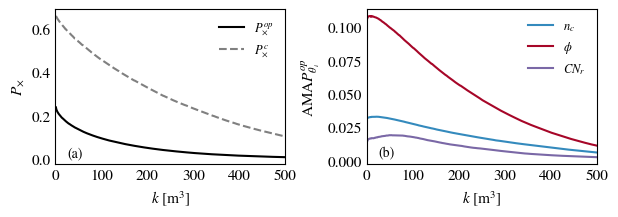

In [26]:
plt.style.use('stylesheet.mpltstyle')
fig, ax = plt.subplots(1, 2, figsize=(6, 2))

ax[0].plot(K, P_uncond, label = r'$P_{\times}^{op}$', color = 'k')
ax[0].plot(K, P_current, label = r'$P_{\times}^{c}$', color = 'gray', linestyle = '--')
ax[0].set_xlabel('$k$ [m$^3$]')
ax[0].set_ylabel(r'$P_{\times}$')
ax[0].text(0.05, 0.05, '(a)', transform=ax[0].transAxes, fontsize = 10)
ax[0].set_xlim(0, 500)
ax[0].legend(ncol = 1, frameon=False)

ax[1].plot(K, np.mean(space_k_vs_AMAP[0,:,:], axis = 0), label=r'$n_c$', color = '#348ABD')
ax[1].plot(K, np.mean(space_k_vs_AMAP[1,:,:], axis = 0), label=r'$\phi$', color = '#A60628')
ax[1].plot(K, np.mean(space_k_vs_AMAP[2,:,:], axis = 0), label=r'$CN_r$', color = '#7A68A6')
ax[1].text(0.05, 0.05, '(b)', transform=ax[1].transAxes, fontsize = 10)
ax[1].set_xlabel('$k$ [m$^3$]')
ax[1].set_ylabel(r'$\text{AMA}P_{\theta_i}^{op}$')
ax[1].set_xlim([0, 500])
plt.legend(frameon=False)

plt.savefig('Figures_paper/AMAP_operational.png', dpi=200, bbox_inches='tight')
plt.savefig('Figures_paper/AMAP_operational.pdf')

#### Compute efficiency vs k

In [14]:
current_data = np.loadtxt('output/results_stochastic_current_operational.csv', delimiter=',')[:,4:]
operational_data = np.loadtxt('output/results_stochastic00.csv', delimiter=',')


space_k_vs_efficiency = np.zeros((24, len(K)))
for op_condition in range(5, 29):
    for n_k, k in enumerate(K):
        fail_current = current_data*1000 > k
        no_fail_operative = operational_data[:,op_condition-1]*1000 <= k
        both = np.logical_and(fail_current.flatten(), no_fail_operative.flatten())
        space_k_vs_efficiency[op_condition-5, n_k] = np.sum(both)/len(both)


#### k vs w

This plot which is presented for the best and worst operational conditions will show the relationship between k and w for three different cases:

Case A: The system wasnt failing and is still ok

Case B: The system was failing and now is not failing

Case C: The system was failing and continue failing

In [15]:
K = np.linspace(1, 500, 500)

current_data = np.loadtxt('output/results_stochastic_current_operational.csv', delimiter=',')[:,4]
operative_data = np.loadtxt('output/results_stochastic00.csv', delimiter=',')[:, 9]

stochastic_quantities = np.loadtxt('output/results_stochastic00.csv', delimiter=',')[:, :4]

space_k_vs_w = np.zeros((4, 3, len(K)))
space_k_vs_w_current = np.zeros((4, 2, len(K)))
space_k_vs_w_operational = np.zeros((4, 2, len(K)))

for n_k, k in enumerate(K):
    fail_current = current_data*1000 > k
    no_fail_current = current_data*1000 <= k
    fail_operative = operative_data*1000 > k
    no_fail_operative = operative_data*1000 <= k

    A = np.logical_and(no_fail_current.flatten(), no_fail_operative.flatten())
    B = np.logical_and(fail_current.flatten(), no_fail_operative.flatten())
    C = np.logical_and(fail_current.flatten(), fail_operative.flatten())

    space_k_vs_w[0, 0, n_k] = np.mean(stochastic_quantities[A, 0])
    space_k_vs_w[0, 1, n_k] = np.mean(stochastic_quantities[B, 0])
    space_k_vs_w[0, 2, n_k] = np.mean(stochastic_quantities[C, 0])

    space_k_vs_w[1, 0, n_k] = np.mean(stochastic_quantities[A, 1])
    space_k_vs_w[1, 1, n_k] = np.mean(stochastic_quantities[B, 1])
    space_k_vs_w[1, 2, n_k] = np.mean(stochastic_quantities[C, 1])

    space_k_vs_w[2, 0, n_k] = np.mean(stochastic_quantities[A, 2])
    space_k_vs_w[2, 1, n_k] = np.mean(stochastic_quantities[B, 2])
    space_k_vs_w[2, 2, n_k] = np.mean(stochastic_quantities[C, 2])

    space_k_vs_w[3, 0, n_k] = np.mean(stochastic_quantities[A, 3])
    space_k_vs_w[3, 1, n_k] = np.mean(stochastic_quantities[B, 3])
    space_k_vs_w[3, 2, n_k] = np.mean(stochastic_quantities[C, 3])

    space_k_vs_w_current[0, 0, n_k] = np.mean(stochastic_quantities[fail_current, 0])
    space_k_vs_w_current[0, 1, n_k] = np.mean(stochastic_quantities[no_fail_current, 0])
    space_k_vs_w_operational[0, 0, n_k] = np.mean(stochastic_quantities[fail_operative, 0])
    space_k_vs_w_operational[0, 1, n_k] = np.mean(stochastic_quantities[no_fail_operative, 0])

    space_k_vs_w_current[1, 0, n_k] = np.mean(stochastic_quantities[fail_current, 1])
    space_k_vs_w_current[1, 1, n_k] = np.mean(stochastic_quantities[no_fail_current, 1])
    space_k_vs_w_operational[1, 0, n_k] = np.mean(stochastic_quantities[fail_operative, 1])
    space_k_vs_w_operational[1, 1, n_k] = np.mean(stochastic_quantities[no_fail_operative, 1])

    space_k_vs_w_current[2, 0, n_k] = np.mean(stochastic_quantities[fail_current, 2])
    space_k_vs_w_current[2, 1, n_k] = np.mean(stochastic_quantities[no_fail_current, 2])
    space_k_vs_w_operational[2, 0, n_k] = np.mean(stochastic_quantities[fail_operative, 2])
    space_k_vs_w_operational[2, 1, n_k] = np.mean(stochastic_quantities[no_fail_operative, 2])

    space_k_vs_w_current[3, 0, n_k] = np.mean(stochastic_quantities[fail_current, 3])
    space_k_vs_w_current[3, 1, n_k] = np.mean(stochastic_quantities[no_fail_current, 3])
    space_k_vs_w_operational[3, 0, n_k] = np.mean(stochastic_quantities[fail_operative, 3])
    space_k_vs_w_operational[3, 1, n_k] = np.mean(stochastic_quantities[no_fail_operative, 3])

c:\Users\Leonardo\miniconda3\envs\operational\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Leonardo\miniconda3\envs\operational\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
K = np.linspace(1, 500, 500)

current_data = np.loadtxt('output/results_stochastic_current_operational.csv', delimiter=',')[:,4]
operative_data = np.loadtxt('output/results_stochastic00.csv', delimiter=',')[:, 9]

stochastic_quantities = np.loadtxt('output/results_stochastic00.csv', delimiter=',')[:, :4]

space_k_vs_w = np.zeros((4, 3, len(K)))
space_k_vs_w_current = np.zeros((4, 2, len(K)))
space_k_vs_w_operational = np.zeros((4, 2, len(K)))

for n_k, k in enumerate(K):
    fail_current = current_data*1000 > k
    no_fail_current = current_data*1000 <= k
    fail_operative = operative_data*1000 > k
    no_fail_operative = operative_data*1000 <= k

    A = np.logical_and(no_fail_current.flatten(), no_fail_operative.flatten())
    B = fail_operative.flatten()
    # C = np.logical_and(fail_current.flatten(), fail_operative.flatten())

    space_k_vs_w[0, 0, n_k] = np.mean(stochastic_quantities[A, 0])
    space_k_vs_w[0, 1, n_k] = np.mean(stochastic_quantities[B, 0])
    # space_k_vs_w[0, 2, n_k] = np.mean(stochastic_quantities[C, 0])

    space_k_vs_w[1, 0, n_k] = np.mean(stochastic_quantities[A, 1])
    space_k_vs_w[1, 1, n_k] = np.mean(stochastic_quantities[B, 1])
    # space_k_vs_w[1, 2, n_k] = np.mean(stochastic_quantities[C, 1])

    space_k_vs_w[2, 0, n_k] = np.mean(stochastic_quantities[A, 2])
    space_k_vs_w[2, 1, n_k] = np.mean(stochastic_quantities[B, 2])
    # space_k_vs_w[2, 2, n_k] = np.mean(stochastic_quantities[C, 2])

    space_k_vs_w[3, 0, n_k] = np.mean(stochastic_quantities[A, 3])
    space_k_vs_w[3, 1, n_k] = np.mean(stochastic_quantities[B, 3])
    # space_k_vs_w[3, 2, n_k] = np.mean(stochastic_quantities[C, 3])

    space_k_vs_w_current[0, 0, n_k] = np.mean(stochastic_quantities[fail_current, 0])
    space_k_vs_w_current[0, 1, n_k] = np.mean(stochastic_quantities[no_fail_current, 0])
    space_k_vs_w_operational[0, 0, n_k] = np.mean(stochastic_quantities[fail_operative, 0])
    space_k_vs_w_operational[0, 1, n_k] = np.mean(stochastic_quantities[no_fail_operative, 0])

    space_k_vs_w_current[1, 0, n_k] = np.mean(stochastic_quantities[fail_current, 1])
    space_k_vs_w_current[1, 1, n_k] = np.mean(stochastic_quantities[no_fail_current, 1])
    space_k_vs_w_operational[1, 0, n_k] = np.mean(stochastic_quantities[fail_operative, 1])
    space_k_vs_w_operational[1, 1, n_k] = np.mean(stochastic_quantities[no_fail_operative, 1])

    space_k_vs_w_current[2, 0, n_k] = np.mean(stochastic_quantities[fail_current, 2])
    space_k_vs_w_current[2, 1, n_k] = np.mean(stochastic_quantities[no_fail_current, 2])
    space_k_vs_w_operational[2, 0, n_k] = np.mean(stochastic_quantities[fail_operative, 2])
    space_k_vs_w_operational[2, 1, n_k] = np.mean(stochastic_quantities[no_fail_operative, 2])

    space_k_vs_w_current[3, 0, n_k] = np.mean(stochastic_quantities[fail_current, 3])
    space_k_vs_w_current[3, 1, n_k] = np.mean(stochastic_quantities[no_fail_current, 3])
    space_k_vs_w_operational[3, 0, n_k] = np.mean(stochastic_quantities[fail_operative, 3])
    space_k_vs_w_operational[3, 1, n_k] = np.mean(stochastic_quantities[no_fail_operative, 3])

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26108\3309628785.py:43: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


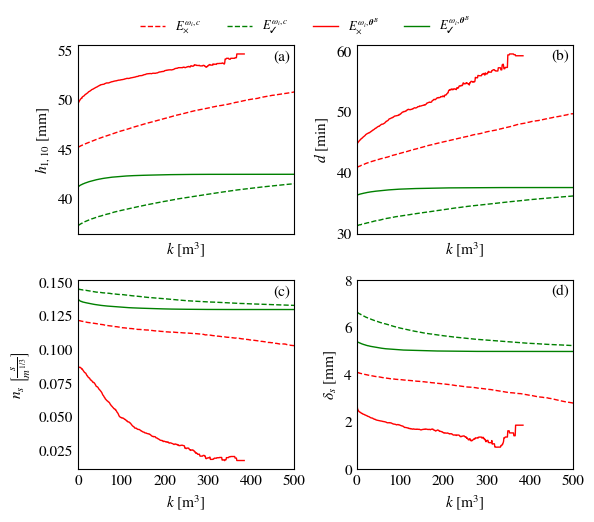

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(6, 5), sharex=True)
ax[0,0].plot(K, space_k_vs_w_current[0, 0, :], label='Fail', linestyle = '--', linewidth = 1, color = 'red')
ax[0,0].plot(K, space_k_vs_w_current[0, 1, :], label='No fail', linestyle = '--', linewidth = 1, color = 'green')
ax[0,0].plot(K, space_k_vs_w_operational[0, 0, :], label='Fail', linewidth = 1, color = 'red')
ax[0,0].plot(K, space_k_vs_w_operational[0, 1, :], label='No fail', linewidth = 1, color = 'green')
ax[0,0].text(0.9, 0.92, '(a)', transform=ax[0,0].transAxes, fontsize = 11)
ax[0,0].set_xlabel('$k$ [m$^3$]')
ax[0,0].set_ylabel('$h_{1,10}$ [mm]')


ax[0,1].plot(K, space_k_vs_w_current[1, 0, :], label='Fail', linestyle = '--', linewidth = 1.0, color = 'red')
ax[0,1].plot(K, space_k_vs_w_current[1, 1, :], label='No fail', linestyle = '--', linewidth = 1.0, color = 'green')
ax[0,1].plot(K, space_k_vs_w_operational[1, 0, :], label='Fail', linewidth = 1.0, color = 'red')
ax[0,1].plot(K, space_k_vs_w_operational[1, 1, :], label='No fail', linewidth = 1.0, color = 'green')
ax[0,1].text(0.9, 0.92, '(b)', transform=ax[0,1].transAxes, fontsize = 11)
ax[0,1].set_xlabel('$k$ [m$^3$]')
ax[0,1].set_ylabel('$d$ [min]')


ax[1,0].plot(K, space_k_vs_w_current[2, 0, :], label='Fail', linestyle = '--', linewidth = 1.0, color = 'red')
ax[1,0].plot(K, space_k_vs_w_current[2, 1, :], label='No fail', linestyle = '--', linewidth = 1.0, color = 'green')
ax[1,0].plot(K, space_k_vs_w_operational[2, 0, :], label='Fail', linewidth = 1.0, color = 'red')
ax[1,0].plot(K, space_k_vs_w_operational[2, 1, :], label='No fail', linewidth = 1.0, color = 'green')
ax[1,0].text(0.9, 0.92, '(c)', transform=ax[1,0].transAxes, fontsize = 11)
ax[1,0].set_xlabel('$k$ [m$^3$]')
ax[1,0].set_ylabel(r'$n_s$ $\left[\frac{s}{m^{1/3}}\right]$')


ax[1,1].plot(K, space_k_vs_w_current[3, 0, :], label=r'$E_{\times}^{\omega_i,c}$', linestyle = '--', linewidth = 1.0, color = 'red')
ax[1,1].plot(K, space_k_vs_w_current[3, 1, :], label=r'$E_{\checkmark}^{\omega_i,c}$', linestyle = '--', linewidth = 1.0, color = 'green')
ax[1,1].plot(K, space_k_vs_w_operational[3, 0, :], label=r'$E_{\times}^{\omega_i,\boldsymbol{\theta}^B}$', linewidth = 1.0, color = 'red')
ax[1,1].plot(K, space_k_vs_w_operational[3, 1, :], label=r'$E_{\checkmark}^{\omega_i,\boldsymbol{\theta}^B}$', linewidth = 1.0, color = 'green')
ax[1,1].text(0.9, 0.92, '(d)', transform=ax[1,1].transAxes, fontsize = 11)
ax[1,1].set_xlabel('$k$ [m$^3$]')
ax[1,1].set_ylabel('$\delta_s$ [mm]')
ax[1,1].set_xlim(0, 500)
ax[1,1].set_ylim(0, 8)
ax[1,1].set_xticks([0, 100, 200, 300, 400, 500])

handles, labels = ax[1,1].get_legend_handles_labels()
fig.legend(handles, labels, ncol = 5, bbox_to_anchor=(0.8, 1.05), frameon = False)

plt.tight_layout()

plt.savefig('Figures_paper/efficiency_vs_stochastic.png', dpi=200, bbox_inches='tight')
plt.savefig('Figures_paper/efficiency_vs_stochastic.pdf', bbox_inches='tight')

Example with w=duration:

Case A: Longer rainfall events tend to produce floodings of higher magnitude
Case B: Longer rainfall events tend to produce floodings of higher magnitude. Hard to analyze

#### How am I improving?

In [17]:
K = np.linspace(1, 500, 500)

current_data = np.loadtxt('output/results_stochastic_current_operational.csv', delimiter=',')[:,4]
operative_data_best = np.loadtxt('output/results_stochastic00.csv', delimiter=',')[:, 27]
operative_data_worst = np.loadtxt('output/results_stochastic00.csv', delimiter=',')[:, 17]

stochastic_quantities = np.loadtxt('output/results_stochastic00.csv', delimiter=',')[:, :4]

space_k_vs_proportion = np.zeros((2, 3, len(K)))

for n_k, k in enumerate(K):
    fail_current = current_data*1000 > k
    no_fail_current = current_data*1000 <= k
    fail_operative_best = operative_data_best*1000 > k
    no_fail_operative_best = operative_data_best*1000 <= k
    fail_operative_worst = operative_data_worst*1000 > k
    no_fail_operative_worst = operative_data_worst*1000 <= k

    A = np.logical_and(no_fail_current.flatten(), no_fail_operative_best.flatten())
    B = np.logical_and(fail_current.flatten(), no_fail_operative_best.flatten())
    C = np.logical_and(fail_current.flatten(), fail_operative_best.flatten())

    space_k_vs_proportion[0, 0, n_k] = np.sum(A)/len(A)
    space_k_vs_proportion[0, 1, n_k] = np.sum(B)/len(B)
    space_k_vs_proportion[0, 2, n_k] = np.sum(C)/len(C)

    A = np.logical_and(no_fail_current.flatten(), no_fail_operative_worst.flatten())
    B = np.logical_and(fail_current.flatten(), no_fail_operative_worst.flatten())
    C = np.logical_and(fail_current.flatten(), fail_operative_worst.flatten())

    space_k_vs_proportion[1, 0, n_k] = np.sum(A)/len(A)
    space_k_vs_proportion[1, 1, n_k] = np.sum(B)/len(B)
    space_k_vs_proportion[1, 2, n_k] = np.sum(C)/len(C)

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26108\2071092238.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


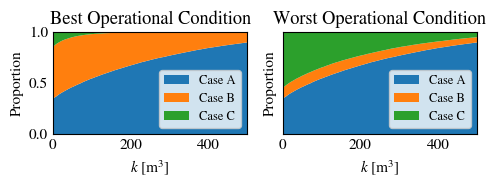

In [18]:
plt.style.use('stylesheet.mpltstyle')

fig, ax = plt.subplots(1, 2, figsize=(5, 2), sharey=True)
ax[0].stackplot(K, space_k_vs_proportion[0,:,:], labels=['Case A', 'Case B', 'Case C'])
ax[0].set_xlim(0, 500)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel('$k$ [m$^3$]')
ax[0].set_ylabel('Proportion')
ax[0].set_title('Best Operational Condition')
ax[0].legend(loc = 4)

ax[1].stackplot(K, space_k_vs_proportion[1,:,:], labels=['Case A', 'Case B', 'Case C'])
ax[1].set_xlim(0, 500)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel('$k$ [m$^3$]')
ax[1].set_ylabel('Proportion')
ax[1].set_title('Worst Operational Condition')
ax[1].legend(loc = 4)

plt.tight_layout()

plt.savefig('Figures_paper/efficiency_proportion.png', dpi=200, bbox_inches='tight')
plt.savefig('Figures_paper/efficiency_proportion.pdf')

# Other things

In [19]:
data = np.loadtxt('output/results_stochastic00.csv', delimiter=',')
data = data[np.all(data[:, :]> 0, axis=1)]
concatenado = np.concatenate((table_pars.T, data[:,4:])).T

diameter_rugosity = np.zeros((4, 2))
diameter_cn = np.zeros((4, 3))
roughness_cn = np.zeros((2, 3))

for num_d, d in enumerate(diameters):
    for num_r, r in enumerate(roughnesses_pipes):
        filter1 = concatenado[concatenado[:,0]==r, :]
        filter2 = filter1[filter1[:,1]==d, 4:]
        diameter_rugosity[num_d, num_r] = np.mean(filter2)*1000

for num_d, d in enumerate(diameters):
    for num_cn, cn in enumerate(CN_decreases):
        filter1 = concatenado[concatenado[:,1]==d, :]
        filter2 = filter1[filter1[:,2]==cn, 4:]
        diameter_cn[num_d, num_cn] = np.mean(filter2)*1000

for num_r, r in enumerate(roughnesses_pipes):
    for num_cn, cn in enumerate(CN_decreases):
        filter1 = concatenado[concatenado[:,0]==r, :]
        filter2 = filter1[filter1[:,2]==cn, 4:]
        roughness_cn[num_r, num_cn] = np.mean(filter2)*1000


In [20]:
data = np.loadtxt('output/results_stochastic00.csv', delimiter=',')
concatenado = np.concatenate((table_pars.T, data[:,4:])).T

threshold = np.linspace(0, 0.5, 501)
K = np.linspace(1, 500, 500)
P__d = np.zeros(len(K))
P__r = np.zeros(len(K))
P__cn = np.zeros(len(K))

for num_t, t in enumerate(K):

    p_uncond = (concatenado[:,4:]>t/1000).sum()/(concatenado[:,4:].shape[0]*concatenado[:,4:].shape[1])

    diameter = []
    roughness = []
    cns = []

    for num_d, d in enumerate(diameters):
        filter1 = concatenado[concatenado[:,1]==d, 4:]
        p_cond = (filter1>t/1000).sum()/(filter1.shape[0]*filter1.shape[1])
        diameter.append(p_cond)
    P__d[num_t] = np.mean(np.abs(np.array(diameter)-p_uncond))

    for num_r, r in enumerate(roughnesses_pipes):
        filter1 = concatenado[concatenado[:,0]==r, 4:]
        p_cond = (filter1>t/1000).sum()/(filter1.shape[0]*filter1.shape[1])
        roughness.append(p_cond)
    P__r[num_t] = np.mean(np.abs(np.array(roughness)-p_uncond))

    for num_cn, cn in enumerate(CN_decreases):
        filter1 = concatenado[concatenado[:,2]==cn, 4:]
        p_cond = (filter1>t/1000).sum()/(filter1.shape[0]*filter1.shape[1])
        cns.append(p_cond)
    P__cn[num_t] = np.mean(np.abs(np.array(cns)-p_uncond))



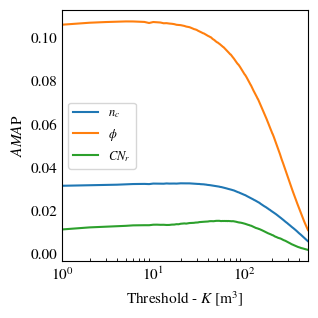

In [21]:
Pt = P__d + P__r + P__cn

fig, ax = plt.subplots(1,1, figsize=(3,3))
ax.plot(K, P__r, label = '$n_c$')
ax.plot(K, P__d, label = '$\phi$')
ax.plot(K, P__cn, label = '$CN_r$')
ax.legend()
ax.set_xlim(1, 500)
ax.semilogx()
ax.set_xlabel('Threshold - $K$ [m$^3$]')
ax.set_ylabel('$AMA$P')

# ax[1].stackplot(threshold*1000, P_d/Pt, P_r/Pt, P_cn/Pt, labels = ['diameter', 'roughness', 'CN'])
# # ax[1].legend()
# ax[1].semilogx()
# ax[1].set_xlim(1, 500)
# ax[1].set_xlabel('Threshold [m$^3$]')
# ax[1].set_ylabel('Relative AMAP')

fig.savefig('Figures_paper/AMAP.png', dpi=200, bbox_inches='tight')

In [22]:
data = np.loadtxt('output/results_stochastic00.csv', delimiter=',')
data_current = np.loadtxt('output/results_stochastic_current_operational.csv', delimiter=',')
concatenado = np.concatenate((table_pars.T, data[:,4:])).T

P_uncond = np.zeros(len(K))
P_current = np.zeros(len(K))
P_d = np.zeros((len(K), len(diameters)))
P_r = np.zeros((len(K), len(roughnesses_pipes)))
P_cn = np.zeros((len(K), len(CN_decreases)))

for num_t, t in enumerate(K):

    for num_d, d in enumerate(diameters):
        filter1 = concatenado[concatenado[:,1]==d, 4:]
        P_d[num_t, num_d] = (filter1>=t/1000).sum()/(filter1.shape[0]*filter1.shape[1])

    for num_r, r in enumerate(roughnesses_pipes):
        filter1 = concatenado[concatenado[:,0]==r, 4:]
        P_r[num_t, num_r] = (filter1>=t/1000).sum()/(filter1.shape[0]*filter1.shape[1])

    for num_cn, cn in enumerate(CN_decreases):
        filter1 = concatenado[concatenado[:,2]==cn, 4:]
        P_cn[num_t, num_cn] = (filter1>=t/1000).sum()/(filter1.shape[0]*filter1.shape[1])

    P_uncond[num_t] = (concatenado[:,4:]>=t/1000).sum()/(concatenado[:,4:].shape[0]*concatenado[:,4:].shape[1])
    P_current[num_t] = (data_current[:,4]>=t/1000).sum()/(data_current[:,4].shape[0])


C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26108\3792713595.py:61: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


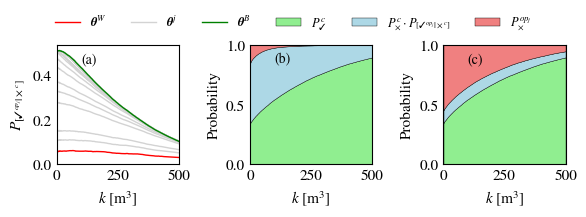

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(6, 2), sharex=True)
plt.style.use('stylesheet.mpltstyle')

ax[0].plot(K, space_k_vs_efficiency[0,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')    
ax[0].plot(K, space_k_vs_efficiency[1,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[2,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[3,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[4,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[5,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')    # Best
ax[0].plot(K, space_k_vs_efficiency[6,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[7,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[8,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')    # Best
ax[0].plot(K, space_k_vs_efficiency[9,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[10,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[11,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')   # Best
ax[0].plot(K, space_k_vs_efficiency[12,:], label=r'$\mathbfit{\theta}^W$', linestyle = '-', linewidth = 1.0, color = 'Red')     # Worst
ax[0].plot(K, space_k_vs_efficiency[13,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[14,:], label=r'$\mathbfit{\theta}^j$', linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[15,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[16,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[17,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[18,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[19,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[20,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')     # Best
ax[0].plot(K, space_k_vs_efficiency[21,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[22,:], linestyle = '-', linewidth = 1.0, color = 'lightgray')
ax[0].plot(K, space_k_vs_efficiency[23,:], label=r'$\mathbfit{\theta}^B$', linestyle = '-', linewidth = 1.0, color = 'Green')     # Best
ax[0].set_xlabel('$k$ [m$^3$]')
ax[0].set_ylabel(r'$P_{[\checkmark^{op_j}| \times^c]}$')
# ax[0].semilogx()
ax[0].set_xlim(0, 500)
ax[0].set_ylim(0, )
ax[0].text(0.20, 0.85, '(a)', transform=ax[0].transAxes, fontsize = 10)
# ax[0].legend(ncol = 1, frameon=False, )

ax[1].stackplot(K, space_k_vs_proportion[0,:,:], labels=[r'$P_{\checkmark}^c$', r'$P_{\times}^c \cdot P_{[\checkmark^{op_j}| \times^c]}$', r'$P_{\times}^{op_j}$'], colors = ['lightgreen', 'lightblue', 'lightcoral'], edgecolor='black', linewidth=0.3)
ax[1].set_xlim(0, 500)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel('$k$ [m$^3$]')
ax[1].set_ylabel('Probability')
# ax[1].set_title('Best Operational Condition')
ax[1].text(0.20, 0.85, '(b)', transform=ax[1].transAxes, fontsize = 10)
# ax[1].legend(loc = 4, ncol = 3)

ax[2].stackplot(K, space_k_vs_proportion[1,:,:], labels=[r'$P_{\checkmark}^c$', r'$P_{\times}^c \cdot P_{[\checkmark^{op_j}| \times^c]}$', r'$P_{\times}^{op_j}$'], colors = ['lightgreen', 'lightblue', 'lightcoral'], edgecolor='black', linewidth=0.3)
ax[2].set_xlim(0, 500)
ax[2].set_ylim(0, 1)
ax[2].set_xlabel('$k$ [m$^3$]')
ax[2].set_ylabel('Probability')
# ax[2].set_title('Worst Operational Condition')
ax[2].text(0.20, 0.85, '(c)', transform=ax[2].transAxes, fontsize = 10)
# ax[2].legend(loc = 4)

handles, labels = [], []

for ax in [ax[0], ax[1]]:
    ax_handles, ax_labels = ax.get_legend_handles_labels()
    handles.extend(ax_handles)
    labels.extend(ax_labels)

plt.tight_layout()
fig.legend(handles, labels, loc='lower center', ncol = 6, frameon=False, bbox_to_anchor=(0.5, 0.9))
plt.savefig('Figures_paper/panel4x4.png', dpi=200, bbox_inches='tight')
plt.savefig('Figures_paper/panel4x4.pdf', bbox_inches='tight')